<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/3H/library_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 7: Comparison between libraries (Modin)
### Group Name: **3H**

### Group Members

| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
| ALIEYA ZAWANIE BINTI A ZAINI | A21EC0156 | MODIN
| MOHAMAD AZRI HADIF BIN MOHAMMAD RIZAL | A21EC0054 | DASK
| IZZAT HAQEEMI BIN HAIRUDIN | A21EC0033 | PANDAS
| ALIYA ZARENA BINTI ZAINULANUAR | A21EC0013 | COMPARISON  

#Dataset Selection

This dataset presents an extensive collection of data from a craft beer brewery, spanning from January 2020 to January 2024. It encapsulates a rich blend of brewing parameters, sales data, and quality assessments, providing a holistic view of the brewing process and its market implications.

<table>
  <tr>
    <th>Column Name</th>
    <th>Description</th>
  </tr>
      <tr>
    <th>Brew_Date</th>
    <th>The date on which the beer batch was brewed.</th>
  </tr>
     <tr>
    <th>Beer_Style</th>
    <th>The style or type of beer, such as IPA, Stout, Lager, Ale, etc.</th>
  </tr>
  <tr>
    <th>SKU</th>
    <th>The packaging type in which the beer is sold, like Kegs, Bottles, Cans, or Pints.</th>
  </tr>
  <tr>
    <th>Location</th>
    <th>The packaging type in which the beer is sold, like Kegs, Bottles, Cans, or Pints.</th>
  </tr>
  <tr>
    <th>Fermentation_Time</th>
    <th>The duration of the fermentation process, measured in days.</th>
  </tr>
  <tr>
    <th>Temperature</th>
    <th>The average temperature (in Celsius) maintained during the brewing process.</th>
  </tr>
  <tr>
    <th>pH_Level</th>
    <th>The pH level of the beer, indicating its acidity or alkalinity.</th>
  </tr>
  <tr>
    <th>Gravity</th>
    <th>A measure of the density of the beer as compared to water, indicating the potential alcohol content.</th>
  </tr>
  <tr>
    <th>Alcohol_Content</th>
    <th>The percentage of alcohol by volume in the beer.</th>
  </tr>
</table>

The link for the dataset https://www.kaggle.com/datasets/ankurnapa/brewery-operations-and-market-analysis-dataset

This dataset format is in CSV

In [ ]:
from google.colab import files
import os

files.upload()
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ankurnapa/brewery-operations-and-market-analysis-dataset

Saving kaggle.json to kaggle.json
 99% 1.05G/1.06G [00:10<00:00, 136MB/s]
100% 1.06G/1.06G [00:10<00:00, 104MB/s]


In [ ]:
! unzip brewery-operations-and-market-analysis-dataset.zip

Archive:  brewery-operations-and-market-analysis-dataset.zip
  inflating: brewery_data_complete_extended.csv  


#Big Data Operation


In [ ]:
 pip install modin[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 14.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 

In [ ]:
import numpy as np
import os
import pandas
import modin.pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import modin.config as cfg
from dask.distributed import Client

os.environ["MODIN_ENGINE"] = "dask"
cfg.NPartitions.put(128)
client = Client(n_workers = 2, threads_per_worker = 2)


INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:39711
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:35015'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39605'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:35019', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:35019
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:46724
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42571', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42571
INFO:distributed.core:Sta

Read the CSV file using Modin

In [ ]:
file_path = 'brewery_data_complete_extended.csv'

start_time = time.time()

mdf = pd.read_csv(file_path)

end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))

print(result_mdf.head())


Time taken: 76.55 seconds
   Batch_ID            Brew_Date  Beer_Style   SKU      Location  \
0   7870796  2020-01-01 00:00:19  Wheat Beer  Kegs    Whitefield   
1   9810411  2020-01-01 00:00:31        Sour  Kegs    Whitefield   
2   2623342  2020-01-01 00:00:40  Wheat Beer  Kegs   Malleswaram   
3   8114651  2020-01-01 00:01:37         Ale  Kegs   Rajajinagar   
4   4579587  2020-01-01 00:01:43       Stout  Cans  Marathahalli   

   Fermentation_Time  Temperature  pH_Level   Gravity  Alcohol_Content  \
0                 16    24.204251  5.289845  1.039504         5.370842   
1                 13    18.086763  5.275643  1.059819         5.096053   
2                 12    15.539333  4.778016  1.037476         4.824737   
3                 17    16.418489  5.345261  1.052431         5.509243   
4                 18    19.144908  4.861854  1.054296         5.133625   

   Bitterness  Color Ingredient_Ratio  Volume_Produced   Total_Sales  \
0          20      5      1:0.32:0.16           

In [ ]:
mdf.head()

,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
0,7870796,2020-01-01 00:00:19,Wheat Beer,Kegs,Whitefield,16,24.204251,5.289845,1.039504,5.370842,20,5,1:0.32:0.16,4666,2664.759345,8.577016,89.195882,4.104988,3.235485,4.663204
1,9810411,2020-01-01 00:00:31,Sour,Kegs,Whitefield,13,18.086763,5.275643,1.059819,5.096053,36,14,1:0.39:0.24,832,9758.801062,7.420541,72.480915,2.676528,4.246129,2.044358
2,2623342,2020-01-01 00:00:40,Wheat Beer,Kegs,Malleswaram,12,15.539333,4.778016,1.037476,4.824737,30,10,1:0.35:0.16,2115,11721.087016,8.451365,86.322144,3.299894,3.109440,3.033880
3,8114651,2020-01-01 00:01:37,Ale,Kegs,Rajajinagar,17,16.418489,5.345261,1.052431,5.509243,48,18,1:0.35:0.15,3173,12050.177463,9.671859,83.094940,2.136055,4.634254,1.489889
4,4579587,2020-01-01 00:01:43,Stout,Cans,Marathahalli,18,19.144908,4.861854,1.054296,5.133625,57,13,1:0.46:0.11,4449,5515.077465,7.895334,88.625833,4.491724,2.183389,2.990630


 # Reducing Modin Memory Usage
Display basic information about the DataFrame

In this code snippet, Modin is employed to enhance the efficiency of memory usage. The selected columns from the dataset, including "Beer_Style," "SKU," "Fermentation_Time," "Temperature," "pH_Level," "Gravity," "Alcohol_Content," and "Quality_Score," are loaded using Modin's distributed DataFrame, mdf.

The `info` method is utilized to provide a concise summary of the DataFrame. The `verbose` parameter is set to False for a streamlined output, and `memory_usage` is configured to "deep" to obtain accurate memory usage information.

In [ ]:
selected_columns = ["Beer_Style", "Location", "SKU", "Fermentation_Time", "Temperature", "pH_Level",
                    "Gravity", "Alcohol_Content", "Quality_Score", "Total_Sales", "Brewhouse_Efficiency"]
mdf = mdf[selected_columns]


start_time_info = time.time()
mdf.info()
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Beer_Style            object 
 1   Location              object 
 2   SKU                   object 
 3   Fermentation_Time     int64  
 4   Temperature           float64
 5   pH_Level              float64
 6   Gravity               float64
 7   Alcohol_Content       float64
 8   Quality_Score         float64
 9   Total_Sales           float64
 10  Brewhouse_Efficiency  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 839.2+ MB

Time taken to run the info operation: 10.27 seconds


In [ ]:
mdf.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 20 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Batch_ID                      int64  
 1   Brew_Date                     object 
 2   Beer_Style                    object 
 3   SKU                           object 
 4   Location                      object 
 5   Fermentation_Time             int64  
 6   Temperature                   float64
 7   pH_Level                      float64
 8   Gravity                       float64
 9   Alcohol_Content               float64
 10  Bitterness                    int64  
 11  Color                         int64  
 12  Ingredient_Ratio              object 
 13  Volume_Produced               int64  
 14  Total_Sales                   float64
 15  Quality_Score                 float64
 16  Brewhouse_Efficiency          float64
 17  Loss_During_Brewing           float64
 18  Loss_During_Ferm

In [ ]:
mdf

,Beer_Style,Location,SKU,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Quality_Score,Total_Sales,Brewhouse_Efficiency
0,Wheat Beer,Whitefield,Kegs,16,24.204251,5.289845,1.039504,5.370842,8.577016,2664.759345,89.195882
1,Sour,Whitefield,Kegs,13,18.086763,5.275643,1.059819,5.096053,7.420541,9758.801062,72.480915
2,Wheat Beer,Malleswaram,Kegs,12,15.539333,4.778016,1.037476,4.824737,8.451365,11721.087016,86.322144
3,Ale,Rajajinagar,Kegs,17,16.418489,5.345261,1.052431,5.509243,9.671859,12050.177463,83.094940
4,Stout,Marathahalli,Cans,18,19.144908,4.861854,1.054296,5.133625,7.895334,5515.077465,88.625833
...,...,...,...,...,...,...,...,...,...,...,...
9999995,Stout,Yelahanka,Bottles,12,20.719151,4.944343,1.049876,5.437139,6.264104,6655.673836,79.654815
9999996,Wheat Beer,Electronic City,Bottles,19,16.970908,5.121963,1.037019,5.102428,9.651172,10440.357817,89.119201
9999997,IPA,Malleswaram,Bottles,10,24.386184,4.747588,1.047490,5.025251,9.060614,17069.572855,72.555455
9999998,Ale,Electronic City,Kegs,18,18.056172,5.007909,1.046138,5.843181,6.297562,5316.412808,87.650899


Check for missing values


In [ ]:
missing_values = mdf.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Series([], dtype: bool)


Remove duplicate columns

In [ ]:
mdf = mdf.loc[:, ~mdf.columns.duplicated()]

Display information after removing duplicates

In [ ]:
start_time_info = time.time()
print("\nDataFrame Information after Selecting Columns:")
print(mdf.info())
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


DataFrame Information after Selecting Columns:
<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Beer_Style            object 
 1   Location              object 
 2   SKU                   object 
 3   Fermentation_Time     int64  
 4   Temperature           float64
 5   pH_Level              float64
 6   Gravity               float64
 7   Alcohol_Content       float64
 8   Quality_Score         float64
 9   Total_Sales           float64
 10  Brewhouse_Efficiency  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 839.2+ MB
None

Time taken to run the info operation: 3.99 seconds


In [ ]:
import numpy as np

def reduce_mem_usage_modin(mdf):
    start_time = time.time()

    start_mem = mdf.memory_usage(deep=True).sum() / 1024**3
    print('Memory usage of Modin DataFrame is {:.2f} GB'.format(start_mem))

    for col in mdf.columns:
        col_type = mdf[col].dtype

        if col_type != 'object':
            c_min = mdf[col].min()
            c_max = mdf[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    mdf[col] = mdf[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    mdf[col] = mdf[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    mdf[col] = mdf[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    mdf[col] = mdf[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    mdf[col] = mdf[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    mdf[col] = mdf[col].astype(np.float32)
                else:
                    mdf[col] = mdf[col].astype(np.float64)
        else:
            mdf[col] = mdf[col].astype('category')

    end_mem = mdf.memory_usage(deep=True).sum() / 1024**3
    print('Memory usage after optimization is: {:.2f} GB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    end_time = time.time()
    elapsed_time = end_time - start_time
    print('Time taken to run the code: {:.2f} seconds'.format(elapsed_time))

    return mdf

mdf = reduce_mem_usage_modin(mdf)


Memory usage of Modin DataFrame is 2.39 GB
Memory usage after optimization is: 0.17 GB
Decreased by 93.0%
Time taken to run the code: 13.36 seconds


# Exploratory Data Analysis (EDA)
-  This code segment generates histograms for specified numerical columns in the DataFrame, providing a visual representation of the distribution of those features. The printed elapsed time offers insights into the efficiency of the plot generation.

##visualization

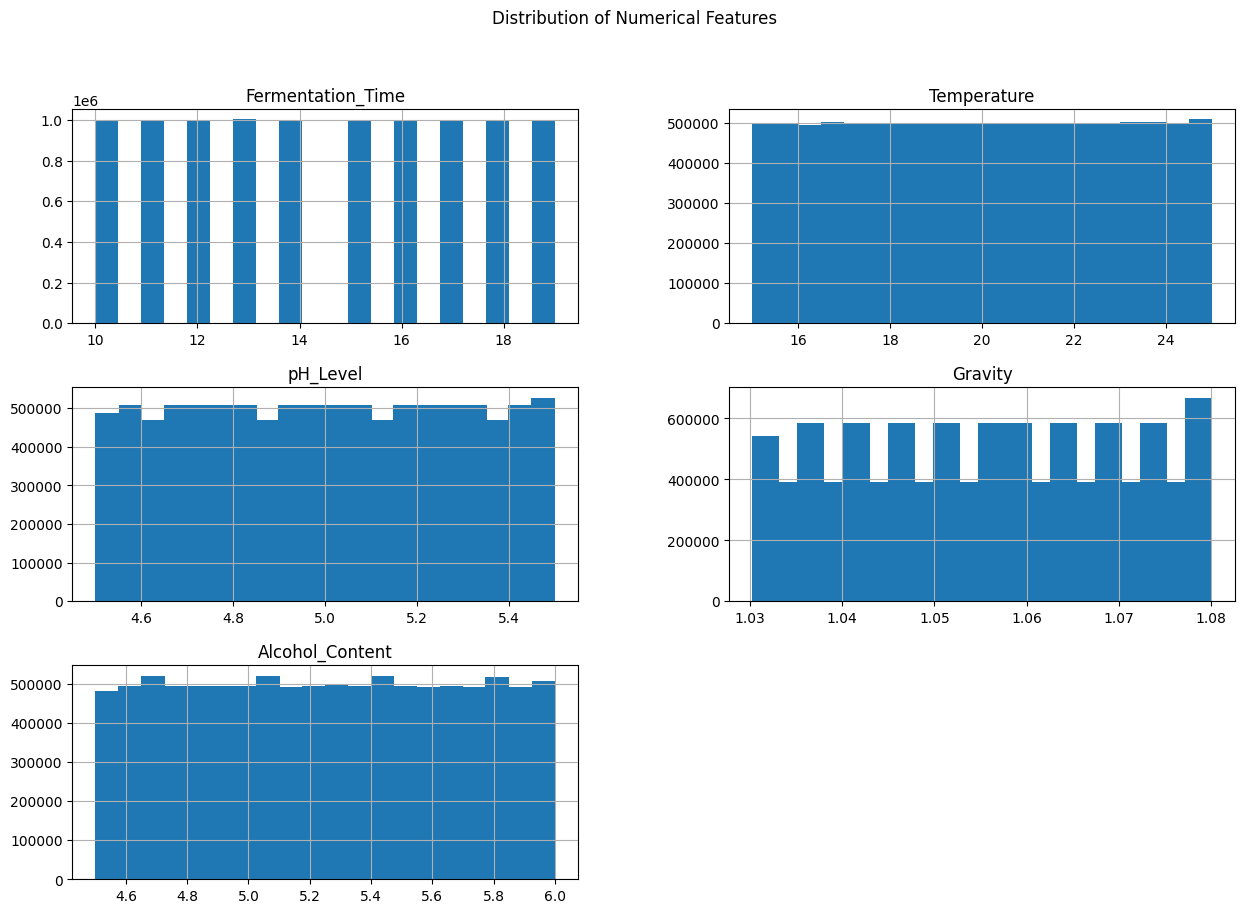


Time taken to run the code: 11.53 seconds


In [ ]:
start_time = time.time()
num_cols = ['Fermentation_Time', 'Temperature', 'pH_Level', 'Gravity', 'Alcohol_Content']
mdf[num_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time

print("\nTime taken to run the code: {:.2f} seconds".format(elapsed_time))

- This script generates a scatter plot to visualize the relationship between pH level and alcohol content in a DataFrame (`df`). The scatter plot is colored by the beer style, providing additional insights into the distribution of data points based on different beer styles.


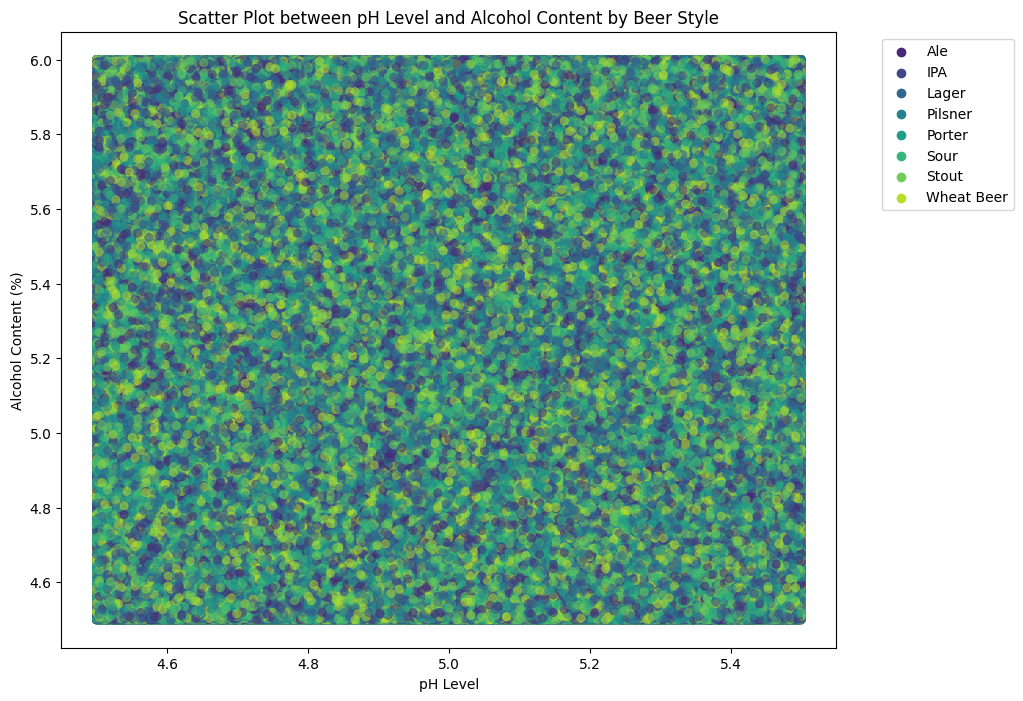


Time taken to run the code: 393.23 seconds


In [ ]:
start_time = time.time()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pH_Level', y='Alcohol_Content', data=mdf, alpha=0.5, hue='Beer_Style', palette='viridis', edgecolor=None)
plt.title('Scatter Plot between pH Level and Alcohol Content by Beer Style')
plt.xlabel('pH Level')
plt.ylabel('Alcohol Content (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Display legend outside the plot
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time

print("\nTime taken to run the code: {:.2f} seconds".format(elapsed_time))

- A boxplot provides a visual summary of the distribution of a continuous variable (in this case, fermentation time) across different categories (beer styles).

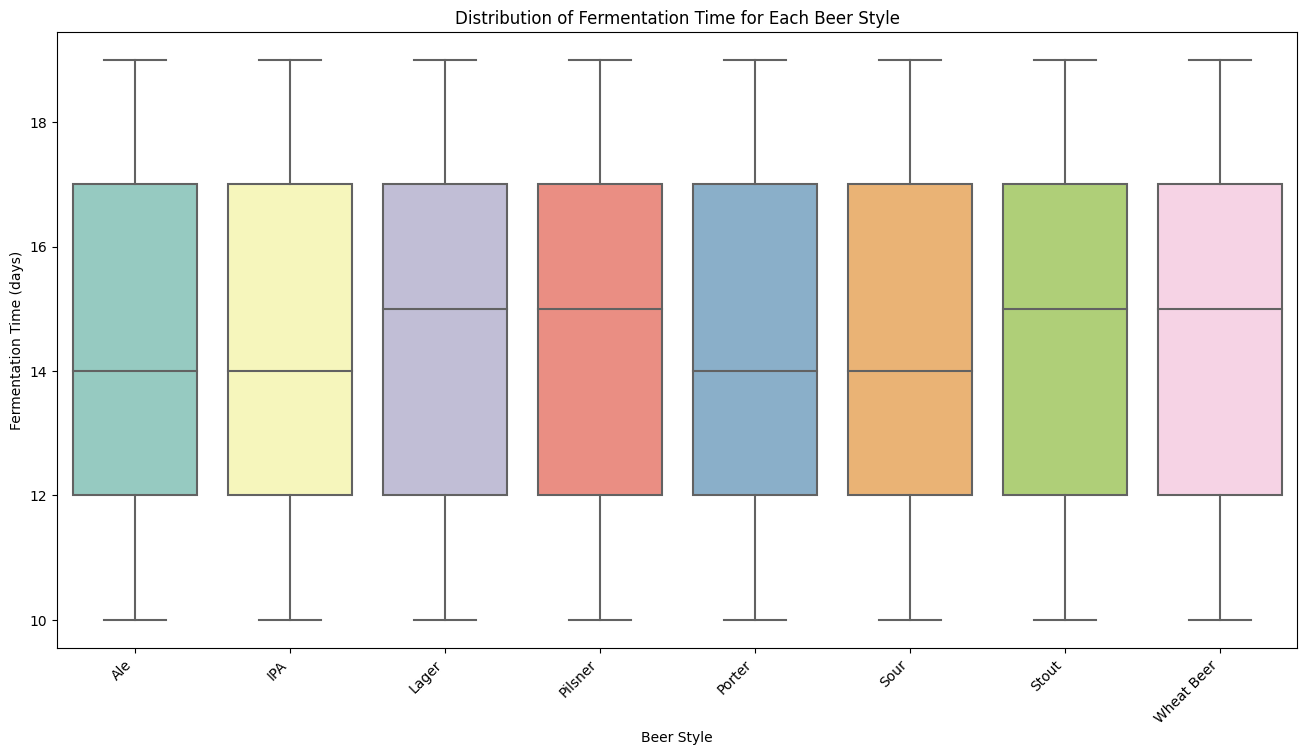


Time taken to run the code: 1.10 seconds


In [ ]:
start_time = time.time()

plt.figure(figsize=(16, 8))
sns.boxplot(x='Beer_Style', y='Fermentation_Time', data=mdf, palette='Set3')
plt.title('Distribution of Fermentation Time for Each Beer Style')
plt.xlabel('Beer Style')
plt.ylabel('Fermentation Time (days)')
plt.xticks(rotation=45, ha='right')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time

print("\nTime taken to run the code: {:.2f} seconds".format(elapsed_time))

- The facet grid with histograms provides a comprehensive view of how alcohol content is distributed across various beer styles which help to facilitating comparisons

<Figure size 1600x800 with 0 Axes>

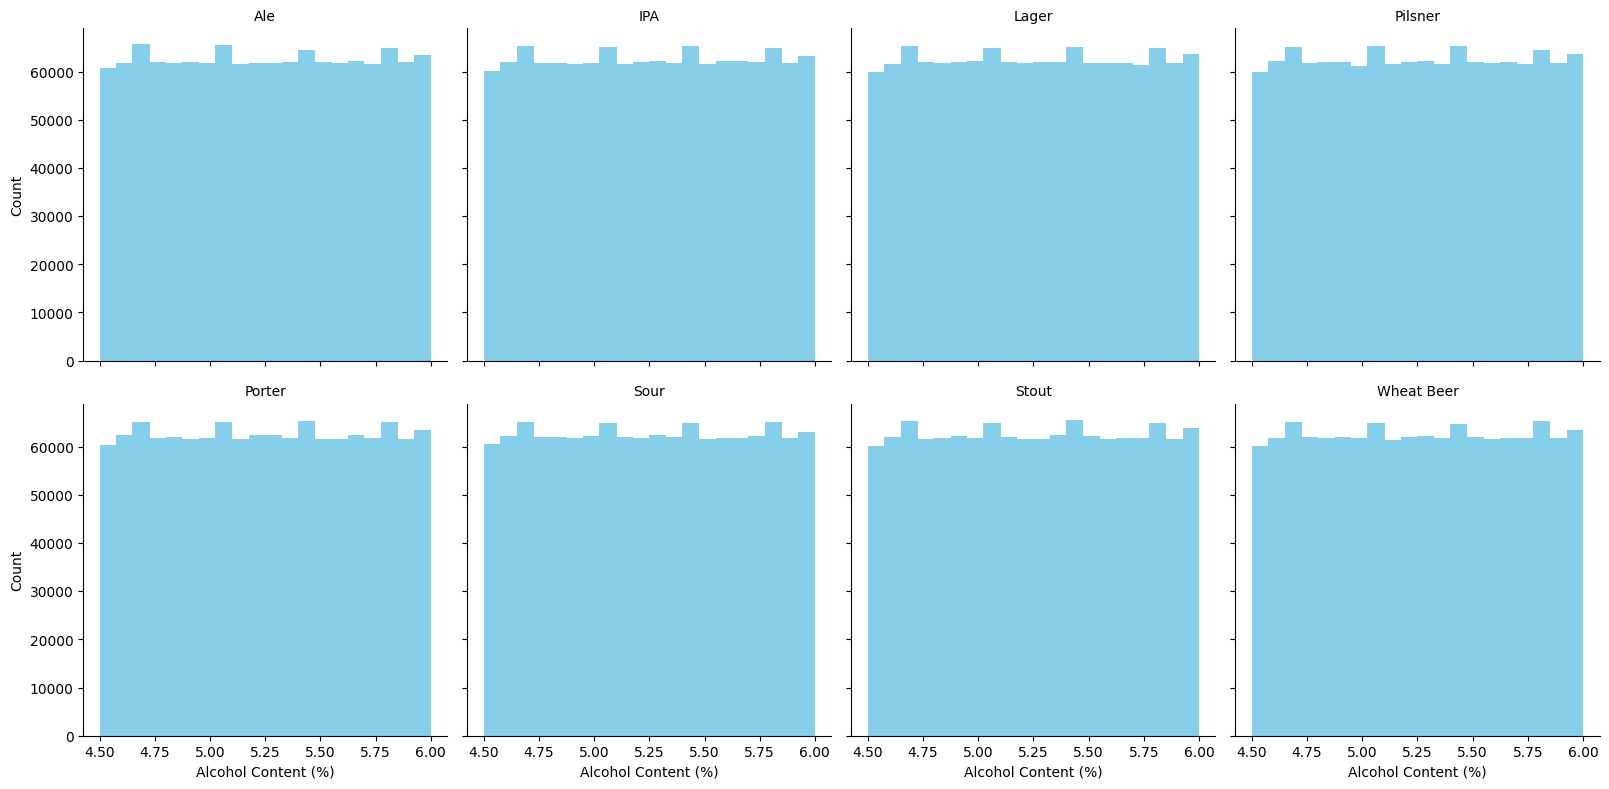


Time taken to run the code: 12.84 seconds


In [ ]:
start_time = time.time()

plt.figure(figsize=(16, 8))
g = sns.FacetGrid(mdf, col='Beer_Style', col_wrap=4, height=4)
g.map(plt.hist, 'Alcohol_Content', bins=20, color='skyblue')
g.set_axis_labels('Alcohol Content (%)', 'Count')
g.set_titles(col_template='{col_name}')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time

print("\nTime taken to run the code: {:.2f} seconds".format(elapsed_time))


- Calculate the average alcohol content for each beer style. This will help identify the typical percentage of alcohol by volume for different types of beer.

Index(['Beer_Style', 'Location', 'SKU', 'Fermentation_Time', 'Temperature',
       'pH_Level', 'Gravity', 'Alcohol_Content', 'Quality_Score',
       'Total_Sales', 'Brewhouse_Efficiency'],
      dtype='object')
   Beer_Style  Alcohol_Content
0         Ale         5.249216
1         IPA         5.250117
2       Lager         5.250011
3     Pilsner         5.249688
4      Porter         5.249617
5        Sour         5.249276
6       Stout         5.249833
7  Wheat Beer         5.249915


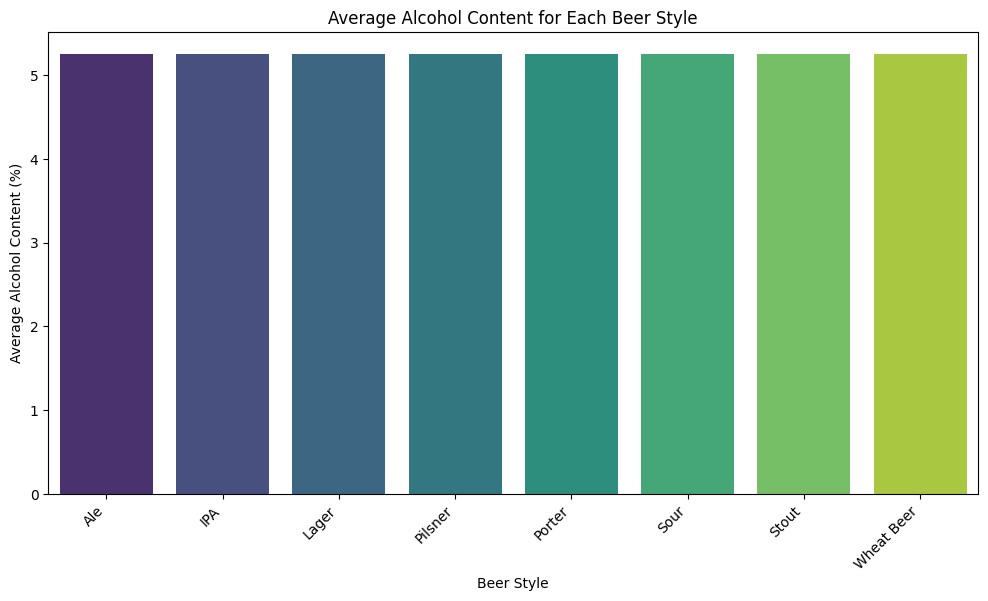


Time taken to run the code: 0.47 seconds


In [ ]:
start_time = time.time()

print(mdf.columns)

# Calculate average alcohol content for each beer style
average_alcohol_by_style = mdf.groupby('Beer_Style')['Alcohol_Content'].mean().reset_index()

# Print the calculated averages
print(average_alcohol_by_style)

# Visualize the results using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Beer_Style', y='Alcohol_Content', data=average_alcohol_by_style, palette='viridis')
plt.title('Average Alcohol Content for Each Beer Style')
plt.xlabel('Beer Style')
plt.ylabel('Average Alcohol Content (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time

print("\nTime taken to run the code: {:.2f} seconds".format(elapsed_time))


- Calculate the average pH level for each beer style. This will provide information about the acidity or alkalinity of different types of beer.

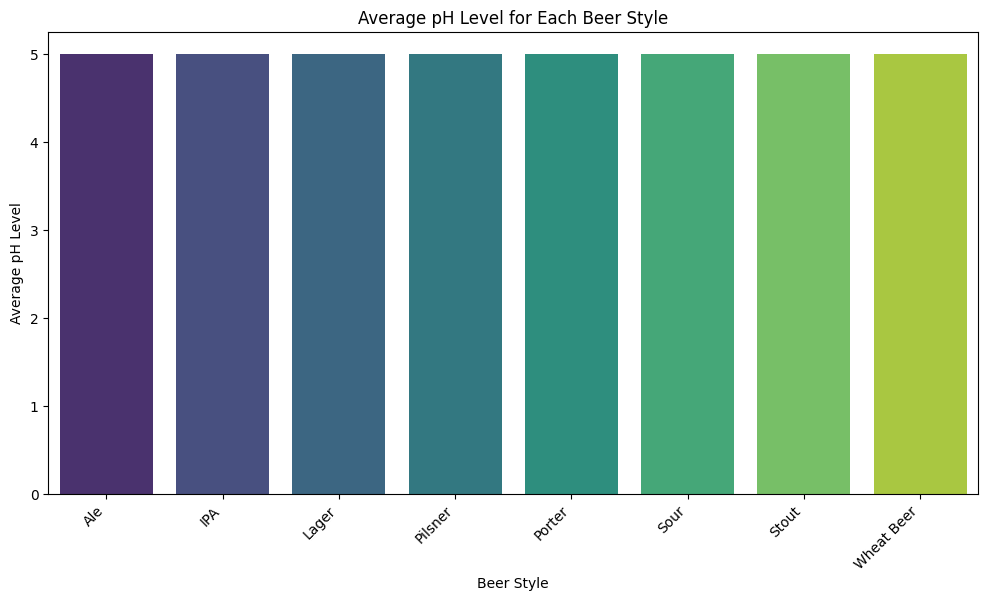


Time taken to run the code: 2.23 seconds


In [ ]:
start_time = time.time()

# Replace infinite values with NaN
mdf.replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculate average pH level for each beer style
average_ph_by_style = mdf.groupby('Beer_Style', observed=False)['pH_Level'].mean().reset_index()

# Visualize the results using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Beer_Style', y='pH_Level', data=average_ph_by_style, palette='viridis')
plt.title('Average pH Level for Each Beer Style')
plt.xlabel('Beer Style')
plt.ylabel('Average pH Level')
plt.xticks(rotation=45, ha='right')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time

print("\nTime taken to run the code: {:.2f} seconds".format(elapsed_time))


- Identify the most common packaging type (Kegs, Bottles, Cans, Pints) for each beer style. This can provide insights into the preferred packaging for different types of beer.

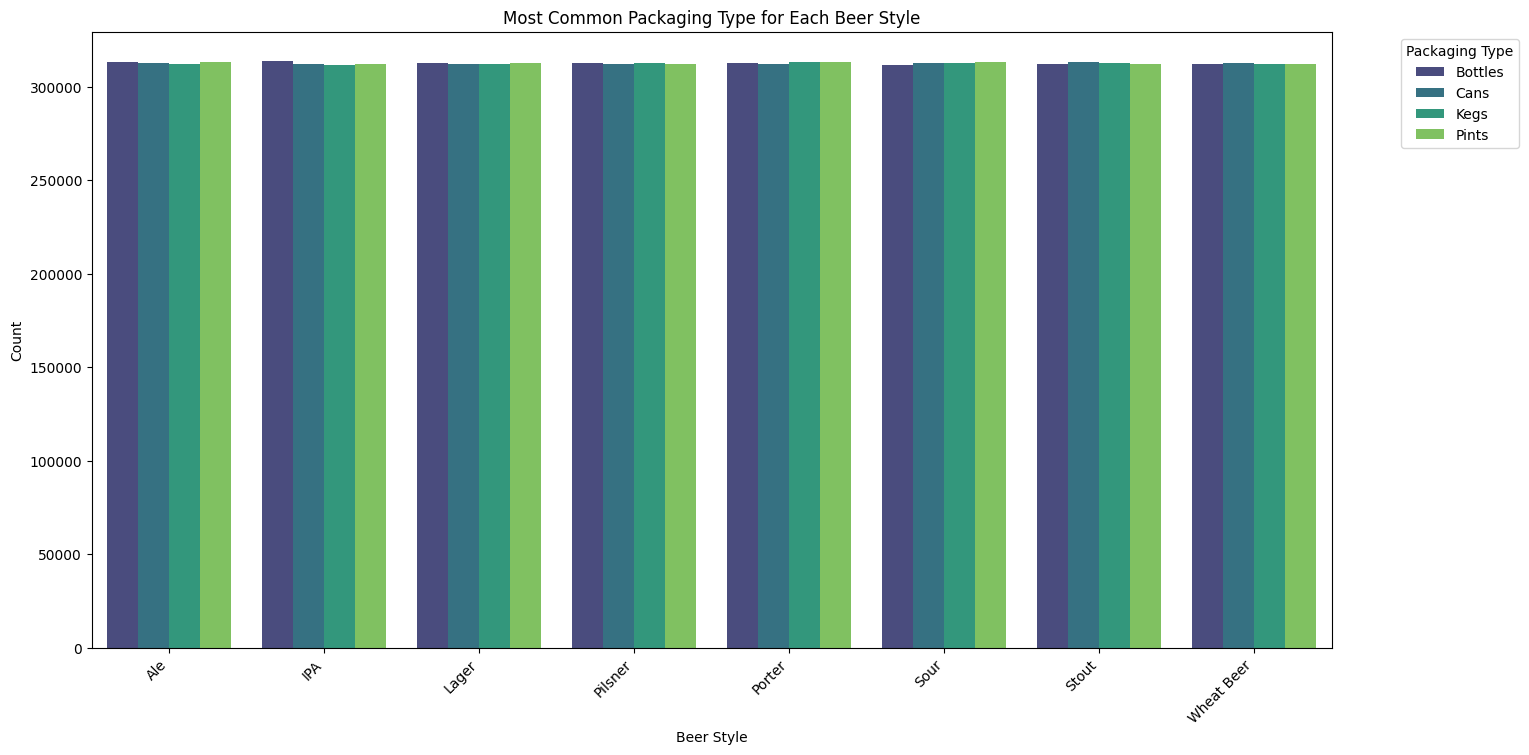


Time taken to run the code: 1.65 seconds


In [ ]:
start_time = time.time()

# Visualize the most common packaging type for each beer style using a countplot
plt.figure(figsize=(16, 8))
sns.countplot(x='Beer_Style', hue='SKU', data=mdf, palette='viridis')
plt.title('Most Common Packaging Type for Each Beer Style')
plt.xlabel('Beer Style')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Packaging Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time

print("\nTime taken to run the code: {:.2f} seconds".format(elapsed_time))

- Explore the relationship between fermentation time and temperature. This could involve scatter plots or correlation analysis to understand if there's a pattern.

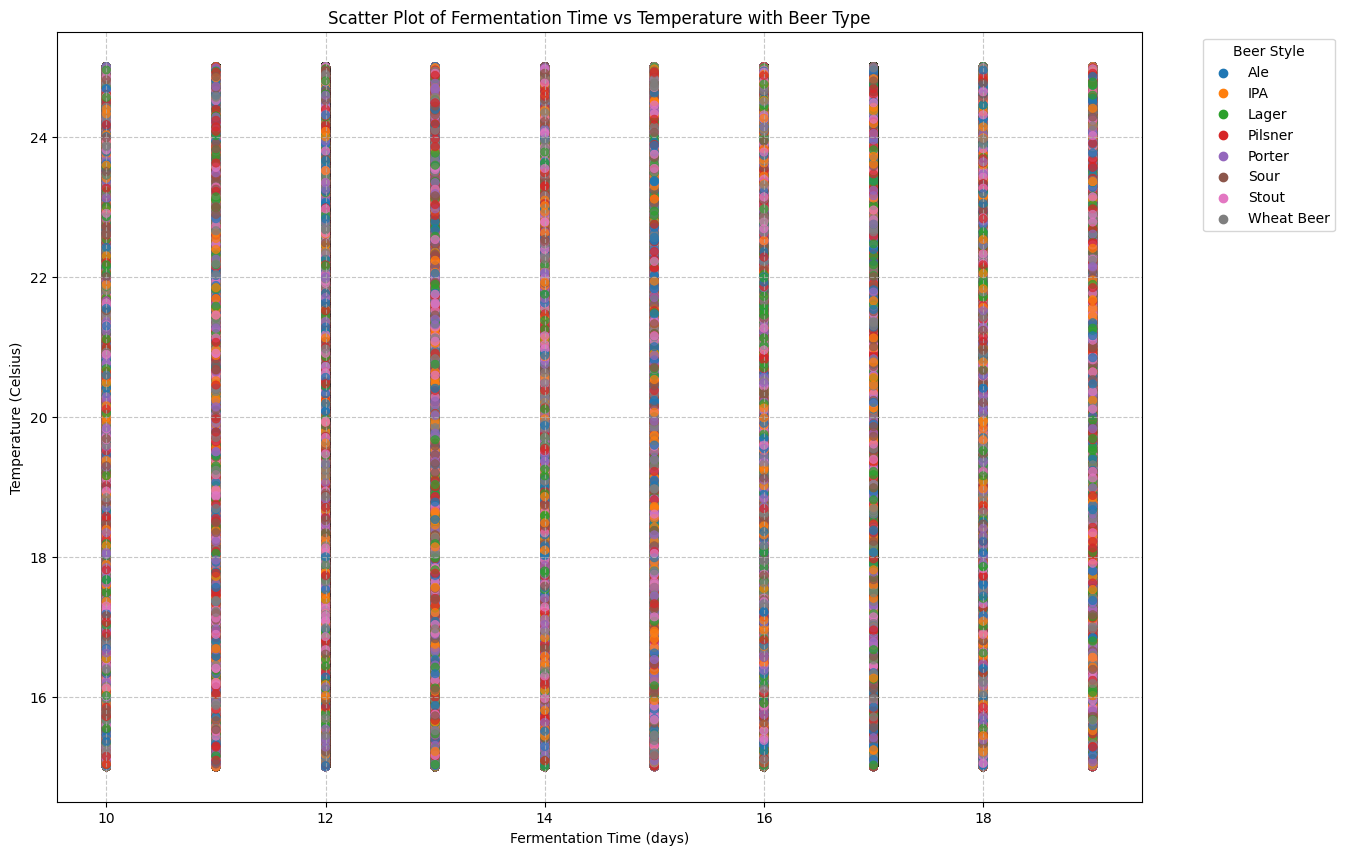


Time taken to run the code: 343.62 seconds


In [ ]:
start_time = time.time()

# Scatter plot of Fermentation Time vs Temperature with Beer_Style
plt.figure(figsize=(14, 10))
sns.scatterplot(x='Fermentation_Time', y='Temperature', hue='Beer_Style', data=mdf, alpha=0.7, palette='tab10', edgecolor=None)
plt.title('Scatter Plot of Fermentation Time vs Temperature with Beer Type')
plt.xlabel('Fermentation Time (days)')
plt.ylabel('Temperature (Celsius)')
plt.legend(title='Beer Style', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time

print("\nTime taken to run the code: {:.2f} seconds".format(elapsed_time))


- This script performs a detailed analysis of brewery-related data stored in a DataFrame (`df`). The analysis includes descriptive statistics, correlation matrix computation, hypothesis testing, and group-wise statistics based on beer styles. The script provides insights into various aspects of the dataset, such as fermentation time, gravity, quality score, and beer style distribution.

##statistical measures

In [ ]:
from scipy import stats

start_time = time.time()

# Assuming 'Beer_Style' is a non-numeric column, you may want to exclude it from correlation
numeric_columns = mdf.select_dtypes(include=['number']).columns
correlation_matrix = mdf[numeric_columns].corr()

numerical_stats = mdf.describe()

mean_value = mdf['Fermentation_Time'].mean()
median_value = mdf['Fermentation_Time'].median()
std_deviation = mdf['Fermentation_Time'].std()

skewness = mdf['Gravity'].skew()
kurtosis = mdf['Gravity'].kurt()

t_statistic, p_value = stats.ttest_1samp(mdf['Quality_Score'], popmean=5)

beer_style_counts = mdf['Beer_Style'].value_counts()

grouped_by_style = mdf.groupby('Beer_Style')[['Fermentation_Time', 'Gravity']].mean()

end_time = time.time()
elapsed_time = end_time - start_time

print("Descriptive Statistics:")
print(numerical_stats)
print("\nCorrelation Matrix:")
print(correlation_matrix)
print("\nMean Fermentation Time:", mean_value)
print("Median Fermentation Time:", median_value)
print("Standard Deviation Fermentation Time:", std_deviation)
print("\nSkewness Gravity:", skewness)
print("Kurtosis Gravity:", kurtosis)
print("\nT-Statistic and P-Value for Quality Score:", t_statistic, p_value)
print("\nBeer Style Counts:")
print(beer_style_counts)
print("\nGrouped by Beer Style:")
print(grouped_by_style)

print("\nTime taken to run the code:", elapsed_time, "seconds")


Descriptive Statistics:
       Fermentation_Time  Temperature     pH_Level       Gravity  \
count       1.000000e+07   10000000.0  10000000.00  1.000000e+07   
mean        1.450090e+01          NaN          NaN           NaN   
std         2.872006e+00          0.0         0.00  0.000000e+00   
min         1.000000e+01         15.0         4.50  1.030273e+00   
25%         1.200000e+01         17.5         4.75  1.042969e+00   
50%         1.500000e+01         20.0         5.00  1.054688e+00   
75%         1.700000e+01         22.5         5.25  1.067383e+00   
max         1.900000e+01         25.0         5.50  1.080078e+00   

       Alcohol_Content  Quality_Score  Total_Sales  Brewhouse_Efficiency  
count     1.000000e+07     10000000.0   10000000.0            10000000.0  
mean               NaN            NaN          NaN                   NaN  
std       0.000000e+00            0.0          NaN                   0.0  
min       4.500000e+00            6.0       1000.0             